# NASA MODIS green data

In [1]:
# Initialize Earth Engine
import ee
ee.Initialize()

In [4]:
import geemap

# Define an area of interest (optional). Here, we'll use the entire world.
AOI = ee.Geometry.Rectangle([-180, -90, 180, 90])

# Fetch the MODIS NDVI dataset for a given date range
start_date = '2000-06-01'
end_date = '2010-07-01'
MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start_date), ee.Date(end_date)).select('NDVI')

# Calculate the mean NDVI for the date range
mean_NDVI = MODIS_NDVI.mean()

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 9000,
    'palette': ['red', 'yellow', 'green', 'darkgreen', 'blue'],
    'breakpoints': [0, 3000, 6000, 8500, 9000]
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(mean_NDVI, vis_params, 'Mean NDVI')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map




Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [3]:
import geemap

# Define an area of interest (optional). Here, we'll use the entire world.
AOI = ee.Geometry.Rectangle([-180, -90, 180, 90])

# Fetch the MODIS NDVI dataset for a given date range
start_date = '2022-06-01'
end_date = '2022-07-01'
MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start_date), ee.Date(end_date)).select('NDVI')

# Calculate the mean NDVI for the date range
mean_NDVI = MODIS_NDVI.mean()

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 9000,
    'palette': ['red', 'yellow', 'green', 'darkgreen', 'blue'],
    'breakpoints': [0, 3000, 6000, 8500, 9000]
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(mean_NDVI, vis_params, 'Mean NDVI')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [5]:
# info
print(mean_NDVI.getInfo())

{'type': 'Image', 'bands': [{'id': 'NDVI', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -32768, 'max': 32767}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


# Look at difference between 2000 and 2022


In [7]:
# Define date ranges for summers of 2000-2003 and 2019-2022
dates_2000_2003 = [('2000-06-01', '2000-08-31'), ('2001-06-01', '2001-08-31'), 
                   ('2002-06-01', '2002-08-31'), ('2003-06-01', '2003-08-31')]

dates_2019_2022 = [('2019-06-01', '2019-08-31'), ('2020-06-01', '2020-08-31'), 
                   ('2021-06-01', '2021-08-31'), ('2022-06-01', '2022-08-31')]

# Fetch and average MODIS NDVI data for each period
def fetch_avg_NDVI(dates):
    image_list = []
    for start, end in dates:
        print(f'Fetching data for {start} to {end}')

        # Fetch the MODIS NDVI dataset for a given date range
        MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start), ee.Date(end)).select('NDVI')

        # Calculate the mean NDVI for the date range
        mean_NDVI = MODIS_NDVI.mean()
       
        # Add the image to the list
        image_list.append(mean_NDVI)

    # Combine the list into an image collection
    print(f'\nlength of image_list: {len(image_list)}')
    combined_collection = ee.ImageCollection(image_list)

    return combined_collection.mean()

avg_NDVI_2000_2003 = fetch_avg_NDVI(dates_2000_2003)
avg_NDVI_2019_2022 = fetch_avg_NDVI(dates_2019_2022)



Fetching data for 2000-06-01 to 2000-08-31
Fetching data for 2001-06-01 to 2001-08-31
Fetching data for 2002-06-01 to 2002-08-31
Fetching data for 2003-06-01 to 2003-08-31

length of image_list: 4
Fetching data for 2019-06-01 to 2019-08-31
Fetching data for 2020-06-01 to 2020-08-31
Fetching data for 2021-06-01 to 2021-08-31
Fetching data for 2022-06-01 to 2022-08-31

length of image_list: 4


# ... Visualization and further analysis ...


In [8]:
# ... Visualization and further analysis ...

# Compute the difference between the two periods
NDVI_difference = avg_NDVI_2019_2022.subtract(avg_NDVI_2000_2003)

# Define visualization parameters
vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': ['darkred', 'red', 'lightcoral', 'white', 'lightgreen', 'green', 'darkgreen']


}


# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(NDVI_difference, vis_params, 'NDVI diff')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")

Map

Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [9]:
# info
print(NDVI_difference.getInfo())
print(NDVI_difference.getInfo()['bands'][0]['id'])
print('')
print(f'Random datapoint, NDVI value and coordinates: {NDVI_difference.reduceRegion(ee.Reducer.first(), AOI, 1000).getInfo()}')
print(f'\nType: {type(NDVI_difference)}')

{'type': 'Image', 'bands': [{'id': 'NDVI', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -65535, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}
NDVI

Random datapoint, NDVI value and coordinates: {'NDVI': None}

Type: <class 'ee.image.Image'>


# Sampling

In [10]:
# Define a global rectangle that avoids the dateline between Russia and Alaska
global_aoi = ee.Geometry.Rectangle([-180, -90, 180, 90
], proj='EPSG:4326', geodesic=False)

# Sample the NDVI_difference image using the adjusted global AOI
sample = NDVI_difference.sample(region=global_aoi, seed=12, geometries=True, scale=10000, factor=0.00032)


# Check the number of sample points
num_samples = sample.size().getInfo()
print(f"Number of sample points: {num_samples}")

# Convert FeatureCollection to List
sample_list = sample.toList(sample.size())
print(f"Sample list length: {sample_list.size().getInfo()}")
print(f"Sample list type: {type(sample_list)}")
print(f"Sample list element type: {type(sample_list.get(0))}")
print(f'\nfirst element: {sample_list.get(0).getInfo()}')

# Convert FeatureCollection to List
# sample_list = sample.toList(sample.size())

# Extract coordinates
sample_features = sample.getInfo()['features']
coordinates = [feature['geometry']['coordinates'] for feature in sample_features]


print(f'length of coordinates: {len(coordinates)}')


# Warning: this next part will take a while to run!
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center on Luxembourg and zoom in

# Add each coordinate as a marker
for coord in coordinates:
    Map.add_marker(location=(coord[1], coord[0]), color="red")

Map


Number of sample points: 728
Sample list length: 728
Sample list type: <class 'ee.ee_list.List'>
Sample list element type: <class 'ee.computedobject.ComputedObject'>

first element: {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [24.238181305345364, -2.1739759884056986]}, 'id': '6', 'properties': {'NDVI': 439.125}}
length of coordinates: 728


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [11]:


# Buffer each point to create a 1x1 km circle around each point
bufferedFeatures = sample.map(lambda feature: feature.buffer(5000))

# Convert buffered feature collection back to image with NDVI values
sample_image = ee.Image().float().paint(bufferedFeatures, 'NDVI', 5)

print(f"Sample image type: {type(sample_image)}")
print(f'\nsample: {sample_image.getInfo()}')
print(f'\nndvi_diff: {NDVI_difference.getInfo()}')


ndvi_vis_params = {
    'min': -500,
    'max': 500,
    'palette': ['brown', 'yellow', 'green']
}

Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center on Luxembourg and zoom in

# Add the sample_image with the NDVI color palette
Map.addLayer(sample_image, ndvi_vis_params, "Sampled NDVI Values")

Map.add_colorbar(ndvi_vis_params, label="NDVI")
Map


Sample image type: <class 'ee.image.Image'>

sample: {'type': 'Image', 'bands': [{'id': 'constant', 'data_type': {'type': 'PixelType', 'precision': 'double'}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}

ndvi_diff: {'type': 'Image', 'bands': [{'id': 'NDVI', 'data_type': {'type': 'PixelType', 'precision': 'double', 'min': -65535, 'max': 65535}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

In [12]:
# Convert the sample to a list for plotting
import numpy as np
data_list = sample.aggregate_array('NDVI').getInfo()

#  Convert the list to a numpy array
data = np.array(data_list)
print(f'data length: {len(data)}')

data length: 728


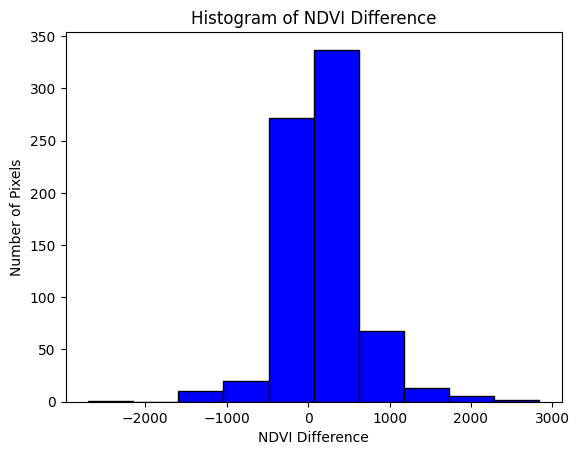

In [13]:
# Plot the histogram
import matplotlib.pyplot as plt
plt.hist(data, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of NDVI Difference')
plt.xlabel('NDVI Difference')
plt.ylabel('Number of Pixels')
plt.show()

# Clustering
#### Code unclear, copy and paste from chatgpt (i dont understand what is happening) //Marius

In [14]:
# Define the region of interest as Africa
region = ee.Geometry.Rectangle([-20, -35, 55, 37])



# Define the number of clusters
n_clusters = 5

# Train the clusterer using the sampled points
clusterer = ee.Clusterer.wekaKMeans(n_clusters).train(sample)
result = NDVI_difference.cluster(clusterer)

# Define a color palette
palette = ['red', 'orange', 'yellow', 'lime', 'green']

# Add the classified image to the map
Map.addLayer(result, {'min': 0, 'max': n_clusters - 1, 'palette': palette}, 'Clusters')

Map


Map(bottom=824.0, center=[-4.214943141390639, -2.9882812500000004], controls=(WidgetControl(options=['position…

# Filtering
#### Let's create a filter for the quality of the Picture.


In [16]:
#Available qualities
available_Qualities = [0,1,2,3]
bad_quality = 2

#choose what quality is too bad to keep
available_Usefulness = [0,1,2,4,8,9,10,12,13,14,15]

#choose what quality is too bad to keep
bad_usefulness = 13


#filter to keep only pixels with a certain image quality or better
def mask_bad_data(image):
    getIndex = available_Usefulness.index(bad_usefulness)
    maskSize = ee.Number(1).add(5).subtract(2)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[0])
    for i in range(1,getIndex):
        # Use the QA band to mask "bad" data points
        mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[i])
        mask = mask.Or(mask2)

    maskSize = ee.Number(1).add(1).subtract(0)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask3 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur).eq(available_Qualities[0])
    for i in range(1,bad_quality):
        # Use the QA band to mask "bad" data points
        mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Qualities[i])
        mask3 = mask3.Or(mask2)

    mask = mask.And(mask3)
    
    return image.updateMask(mask)

#show all the pixels that were deleted due to bad quality in previous filter
def show_bad_data(image):
    getIndex = available_Usefulness.index(bad_usefulness)
    maskSize = ee.Number(1).add(5).subtract(2)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[getIndex])
    if getIndex + 1 < len(available_Usefulness):
        for i in range(getIndex+1,len(available_Usefulness)):
            # Use the QA band to mask "bad" data points
            mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Usefulness[i])
            mask = mask.Or(mask2)

    maskSize = ee.Number(1).add(1).subtract(0)
    maskCur = ee.Number(1).leftShift(maskSize).subtract(1)
    mask3 = image.select('DetailedQA').rightShift(0).bitwiseAnd(maskCur).eq(available_Qualities[bad_quality])
    if bad_quality + 1 < len(available_Qualities):
        for i in range(bad_quality+1,len(available_Qualities)):
            # Use the QA band to mask "bad" data points
            mask2 = image.select('DetailedQA').rightShift(2).bitwiseAnd(maskCur).eq(available_Qualities[i])
            mask3 = mask3.Or(mask2)
        
    mask4 = mask.Not().And(mask3)
    mask5 = mask.And(mask3.Not())
    mask = mask.And(mask3)
    mask = mask.Or(mask4).Or(mask5)
    
    return image.updateMask(mask)

#### First we show all the pixels that were removed due to the bad quality

In [17]:
#test filter on one image
#first let's show the removed pixels
testImage = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date('2019-06-01'), ee.Date('2019-06-12')).select(['NDVI','DetailedQA'])
removedPixel = testImage.map(show_bad_data)

vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': [
         'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ],
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(removedPixel.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

#### Now we show all the pixels that were kept. (As you can see it has the white areas were we removed the pixels)

In [18]:
#now let's see the filtered image
filtered_ndvi = testImage.map(mask_bad_data)

vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': [
        'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ],
}

# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(filtered_ndvi.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…

#### Now lets do our 20 year test without the bad pixel

In [19]:

dates_2000_2003 = [('2000-06-01', '2000-08-31'), ('2001-06-01', '2001-08-31'), 
                   ('2002-06-01', '2002-08-31'), ('2003-06-01', '2003-08-31')]

dates_2019_2022 = [('2019-06-01', '2019-08-31'), ('2020-06-01', '2020-08-31'), 
                   ('2021-06-01', '2021-08-31'), ('2022-06-01', '2022-08-31')]


def fetch_avg_NDVI_Filtered(dates):
    filtered_list = []
    for start, end in dates:
        print(f'Fetching data for {start} to {end}')

        # Fetch the MODIS NDVI dataset for a given date range
        MODIS_NDVI = ee.ImageCollection('MODIS/061/MOD13A2').filterDate(ee.Date(start), ee.Date(end)).select(['NDVI','DetailedQA'])

        filtered_ndvi = MODIS_NDVI.map(mask_bad_data)
        
        # Calculate the mean NDVI for the date range
        mean_Filter = filtered_ndvi.mean()
       
        # Add the image to the list
        filtered_list.append(mean_Filter)

    # Combine the list into an image collection
    print(f'\nlength of image_list: {len(filtered_list)}')
    combined_filtered = ee.ImageCollection(filtered_list)

    return combined_filtered.mean()

avg_Filter_2000_2003 = fetch_avg_NDVI_Filtered(dates_2000_2003)
avg_Filter_2019_2022 = fetch_avg_NDVI_Filtered(dates_2019_2022)

Filter_difference = avg_Filter_2019_2022.subtract(avg_Filter_2000_2003)


# Define visualization parameters
vis_params = {
    'min': -3000,
    'max': 3000,
    'palette': [
        'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
        '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
        '012e01', '011d01', '011301'
    ],
}


# Create a map and add the NDVI layer
Map = geemap.Map()
Map.centerObject(AOI, 2)  # Center the map to our area of interest and set zoom level
Map.addLayer(Filter_difference.select('NDVI'), vis_params, 'Mean Filtered')
Map.addLayerControl()  # This will add a layer control to toggle layers
Map.add_colorbar(vis_params, label="NDVI")
Map

Fetching data for 2000-06-01 to 2000-08-31
Fetching data for 2001-06-01 to 2001-08-31
Fetching data for 2002-06-01 to 2002-08-31
Fetching data for 2003-06-01 to 2003-08-31

length of image_list: 4
Fetching data for 2019-06-01 to 2019-08-31
Fetching data for 2020-06-01 to 2020-08-31
Fetching data for 2021-06-01 to 2021-08-31
Fetching data for 2022-06-01 to 2022-08-31

length of image_list: 4


Map(center=[4.075891298132545e-31, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=…